# TODOs

* Behavioral analyses on mice & simulations
* Total rewards (only first 600 trials per session)
* Update plots like comments in overleaf
* New model with just one value (pos = right; neg = left): because it's so symmetric anyway; might save updating two values
* Save NLL / AIC for each dataset -> do stats

# Imports

In [1]:
import plotnine as gg
gg.theme_set(gg.theme_bw)
import numpy as np
import os
import pandas as pd

# Directories

In [2]:
base_dir = 'C:/Users/maria/MEGAsync/SLCN'
param_dir = os.path.join(base_dir, 'PShumanData/fitting/mice/PSAllModelsResults/')
plot_save_dir = os.path.join(base_dir, 'models/plots/')

# Plot model fits

In [3]:
model_fits = pd.read_csv(os.path.join(param_dir, 'plots', 'modelwise_LLS.csv'))
model_fits = model_fits.sort_values(by=['WAIC']).reset_index(drop=True)
model_fits

,model_name,slope_variable,n_subj,WAIC,NLL,AIC
0,RLabcpnxd,age_z,439,198842.687500,96348.343750,198842.687500
1,RLabnp2d,age_z,439,199109.125000,96920.562500,199109.125000
2,RLabcpnd,age_z,439,203458.921875,99095.460938,203458.921875
3,RLabcpd,age_z,439,204159.062500,99884.531250,204159.062500
4,RLabcd,age_z,439,209396.921875,102942.460938,209396.921875
5,RLabd,age_z,439,219961.843750,108663.921875,219961.843750
6,RLabd,age_z,439,220127.296875,108746.648438,220127.296875


In [4]:
winning_model_name = model_fits[model_fits.WAIC == np.min(model_fits.WAIC)].model_name.values[0]
winning_model_name

'RLabcpnxd'

C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/SLCN\models/plots/WAICs.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


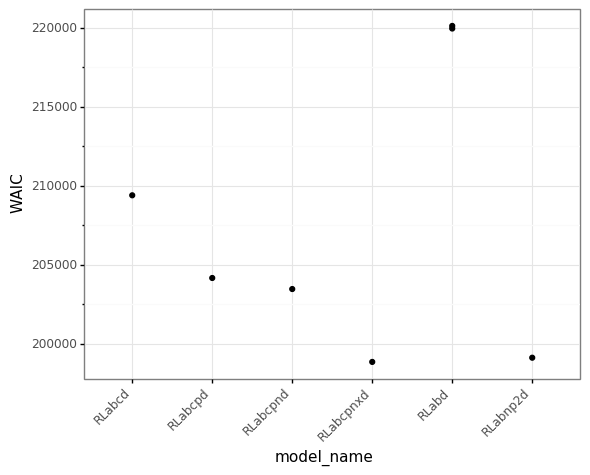

In [6]:
g = (gg.ggplot(model_fits, gg.aes('model_name', 'WAIC'))
 + gg.geom_point()
 + gg.theme_bw()
 + gg.theme(axis_text_x=gg.element_text(rotation=45, hjust=1))
)
g.draw()
g.save(os.path.join(plot_save_dir, 'WAICs.png'))

# Load fitted parameters

In [7]:
all_params = pd.DataFrame()
for file in os.listdir(param_dir):
    if ('csv' in file) and ('nll' not in file):
        new_params = pd.read_csv(os.path.join(param_dir, file))
        all_params = all_params.append(new_params)
all_params.beta /= 15
all_params['age_group'] = ['adult' if treatment == 1 else 'juvenile' for treatment in all_params.treatment]
all_params

,Gender,PDS,PreciseYrs,T1,age_z,alpha,animal,beta,bias,calpha,...,fullID,m,model,nalpha,persev,sID,session,slope_variable,treatment,age_group
0,Male,0,40,0,-1.052498,0.557192,14,0.266561,-0.012619,0.992043,...,1404012,0.0,RLabcd,0.557192,0.000000,1404012,0,age_z,2,juvenile
1,Male,0,41,0,-0.997847,0.766382,14,0.219356,-0.122726,0.394000,...,1404112,0.0,RLabcd,0.766382,0.000000,1404112,1,age_z,2,juvenile
2,Male,0,42,0,-0.943196,0.821385,14,0.180637,-0.203446,0.466543,...,1404212,0.0,RLabcd,0.821385,0.000000,1404212,2,age_z,2,juvenile
3,Male,0,43,0,-0.888545,0.935750,14,0.978542,0.007527,0.974859,...,1404312,0.0,RLabcd,0.935750,0.000000,1404312,3,age_z,2,juvenile
4,Male,0,44,0,-0.833894,0.698734,14,0.293868,-0.042740,0.188001,...,1404412,0.0,RLabcd,0.698734,0.000000,1404412,4,age_z,2,juvenile
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,Female,0,85,0,1.406801,0.992909,13,0.178375,0.019649,0.992909,...,1308521,0.0,RLabnp2d,0.550512,0.511116,1308521,11,age_z,1,adult
435,Female,0,86,0,1.461452,0.795267,13,0.184463,0.056985,0.795267,...,1308621,0.0,RLabnp2d,0.438070,0.464041,1308621,12,age_z,1,adult
436,Female,0,88,0,1.570754,0.855411,13,0.210748,-0.194298,0.855411,...,1308821,0.0,RLabnp2d,0.454894,0.394564,1308821,13,age_z,1,adult
437,Female,0,89,0,1.625405,0.667852,13,0.276526,-0.155182,0.667852,...,1308921,0.0,RLabnp2d,0.364223,0.183931,1308921,14,age_z,1,adult


In [8]:
parameter_colnames = ['alpha', 'beta', 'calpha', 'cnalpha', 'm', 'nalpha', 'persev']
animal_colnames = ['Gender', 'PDS', 'PreciseYrs', 'T1', 'age_z', 'animal', 'fullID', 'sID', 'session', 'treatment', 'age_group']
all_params_long = pd.melt(all_params, id_vars=animal_colnames + ['model', 'slope_variable'],
                          var_name='param_name', value_name='param_value')
all_params_long = all_params_long[all_params_long.param_value != 0]
all_params_long

,Gender,PDS,PreciseYrs,T1,age_z,animal,fullID,sID,session,treatment,age_group,model,slope_variable,param_name,param_value
0,Male,0,40,0,-1.052498,14,1404012,1404012,0,2,juvenile,RLabcd,age_z,alpha,0.557192
1,Male,0,41,0,-0.997847,14,1404112,1404112,1,2,juvenile,RLabcd,age_z,alpha,0.766382
2,Male,0,42,0,-0.943196,14,1404212,1404212,2,2,juvenile,RLabcd,age_z,alpha,0.821385
3,Male,0,43,0,-0.888545,14,1404312,1404312,3,2,juvenile,RLabcd,age_z,alpha,0.935750
4,Male,0,44,0,-0.833894,14,1404412,1404412,4,2,juvenile,RLabcd,age_z,alpha,0.698734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21067,Female,0,85,0,1.406801,13,1308521,1308521,11,1,adult,RLabnp2d,age_z,persev,0.511116
21068,Female,0,86,0,1.461452,13,1308621,1308621,12,1,adult,RLabnp2d,age_z,persev,0.464041
21069,Female,0,88,0,1.570754,13,1308821,1308821,13,1,adult,RLabnp2d,age_z,persev,0.394564
21070,Female,0,89,0,1.625405,13,1308921,1308921,14,1,adult,RLabnp2d,age_z,persev,0.183931


# Plot winning model

C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\stats\smoothers.py:168: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.
  "for lowess smoothings.", PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 10 x 10 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/SLCN\models/plots/ParamsAge.png
  warn('Filename: {}'.format(filename), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\stats\smoothers.py:168: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.
  "for lowess smoothings.", PlotnineWarning)


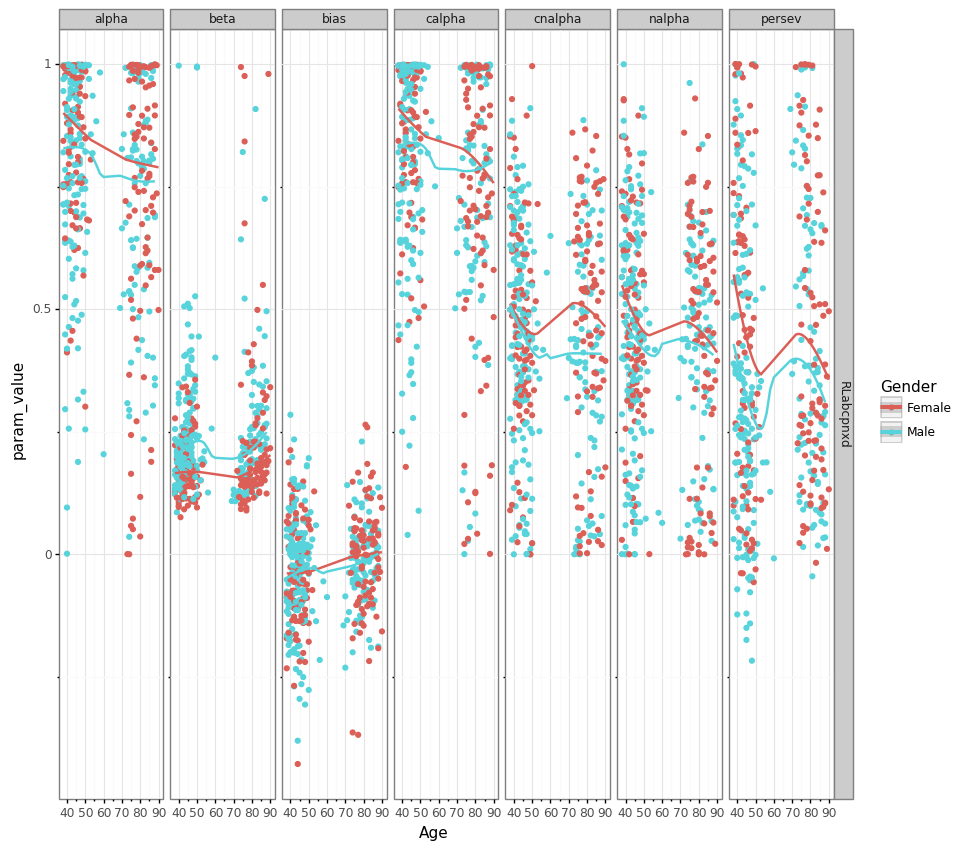

In [9]:
# gg.options.fig_size = (10, 10)
gg.options.figure_size = (10, 10)
win_mod_sub = all_params_long.model == winning_model_name
g = (gg.ggplot(all_params_long[win_mod_sub], gg.aes('PreciseYrs', 'param_value', color='Gender'))
 + gg.geom_point()
 + gg.theme_bw()
 + gg.geom_smooth()
 + gg.facet_grid('model~param_name')
 + gg.labs(x='Age')
)
g.draw()
g.save(os.path.join(plot_save_dir, 'ParamsAge.png'))

C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\stats\smoothers.py:168: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.
  "for lowess smoothings.", PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 10 x 10 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/SLCN\models/plots/ParamsSession.png
  warn('Filename: {}'.format(filename), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\stats\smoothers.py:168: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.
  "for lowess smoothings.", PlotnineWarning)


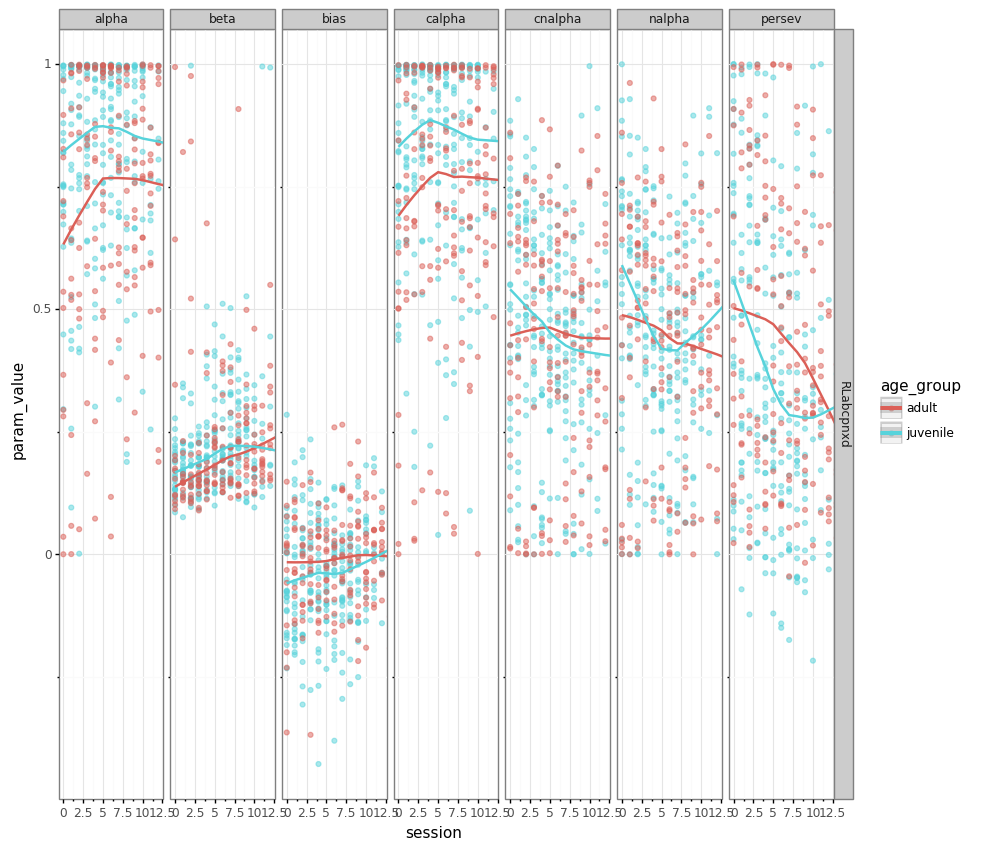

In [10]:
g = (gg.ggplot(all_params_long[win_mod_sub], gg.aes('session', 'param_value', color='age_group'))
 + gg.geom_point(alpha=0.5)
 + gg.theme_bw()
 + gg.geom_smooth()
 + gg.coord_cartesian(xlim=(0, 12))
 + gg.facet_grid('model~param_name')
)
g.draw()
g.save(os.path.join(plot_save_dir, 'ParamsSession.png'))

C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 10 x 10 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/SLCN\models/plots/ParamsAgegroup.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


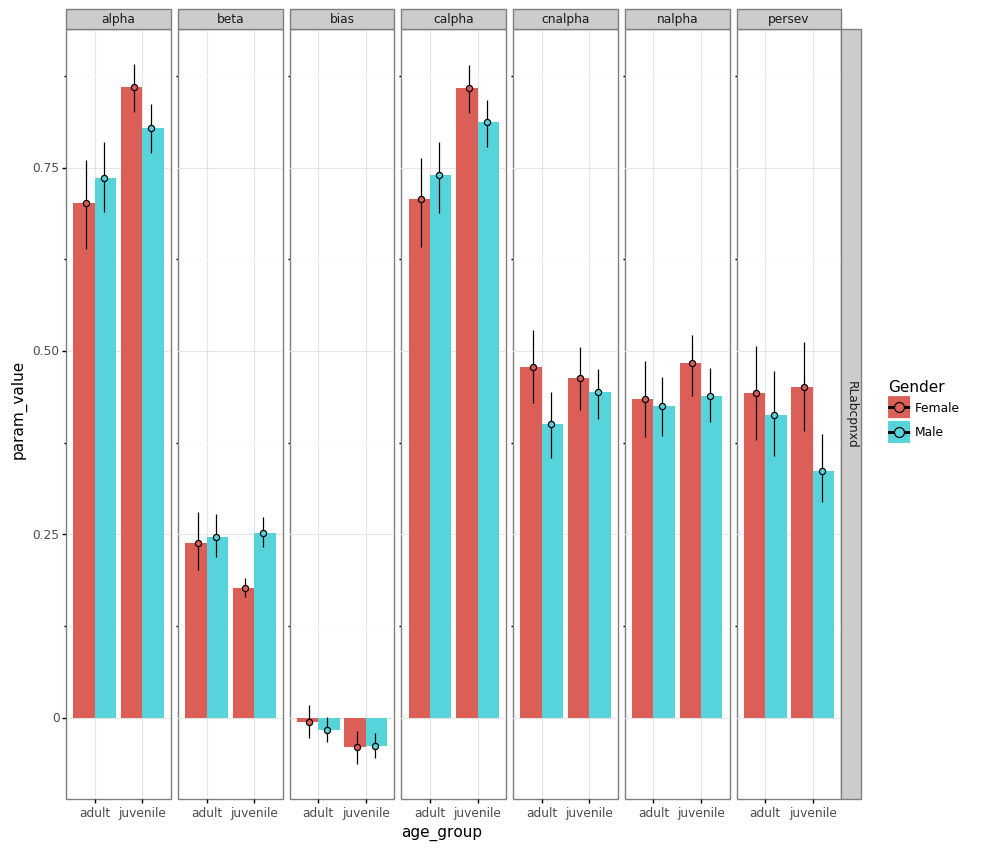

In [11]:
g = (gg.ggplot(all_params_long[win_mod_sub],
           gg.aes('age_group', 'param_value', fill='Gender'))
 + gg.stat_summary(geom='bar', position=gg.position_dodge)
 + gg.stat_summary(geom='pointrange', position=gg.position_dodge(width=0.75))
 + gg.theme_bw()
 + gg.facet_grid('model~param_name')
)
g.draw()
g.save(os.path.join(plot_save_dir, 'ParamsAgegroup.png'))

C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 10 x 10 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/SLCN\models/plots/BiasSession.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


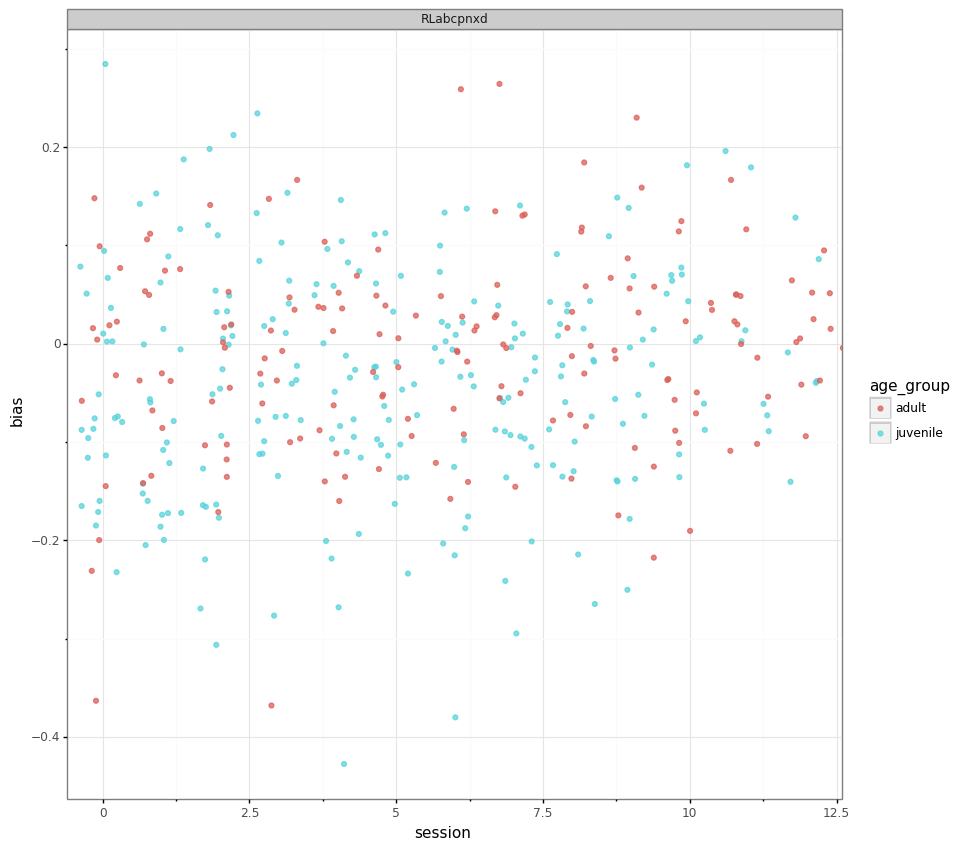

In [12]:
win_mod_sub_ = all_params.model == winning_model_name
g = (gg.ggplot(all_params[win_mod_sub_], gg.aes('session', 'bias', color='age_group'))
 + gg.geom_jitter(alpha=0.75)
 + gg.theme_bw()
 + gg.facet_grid('~model')
 + gg.coord_cartesian(xlim=(0, 12))
)
g.draw()
g.save(os.path.join(plot_save_dir, 'BiasSession.png'))

In [12]:
ql = 0.5
qr = 0.7
bias = -1
beta = 5
pr = 1 / (1 + np.exp(beta * (ql - qr - bias)))
pr

0.01798620996209156

# Plot all models

C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\stats\smoothers.py:168: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.
  "for lowess smoothings.", PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\utils.py:634: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat(lst, axis=axis, ignore_index=True)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\layer.py:452: PlotnineWarning: geom_point : Removed 2634 rows containing missing values.
  self.data = self.geom.handle_na(self.data)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 10 x 10 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\maria\Anacon

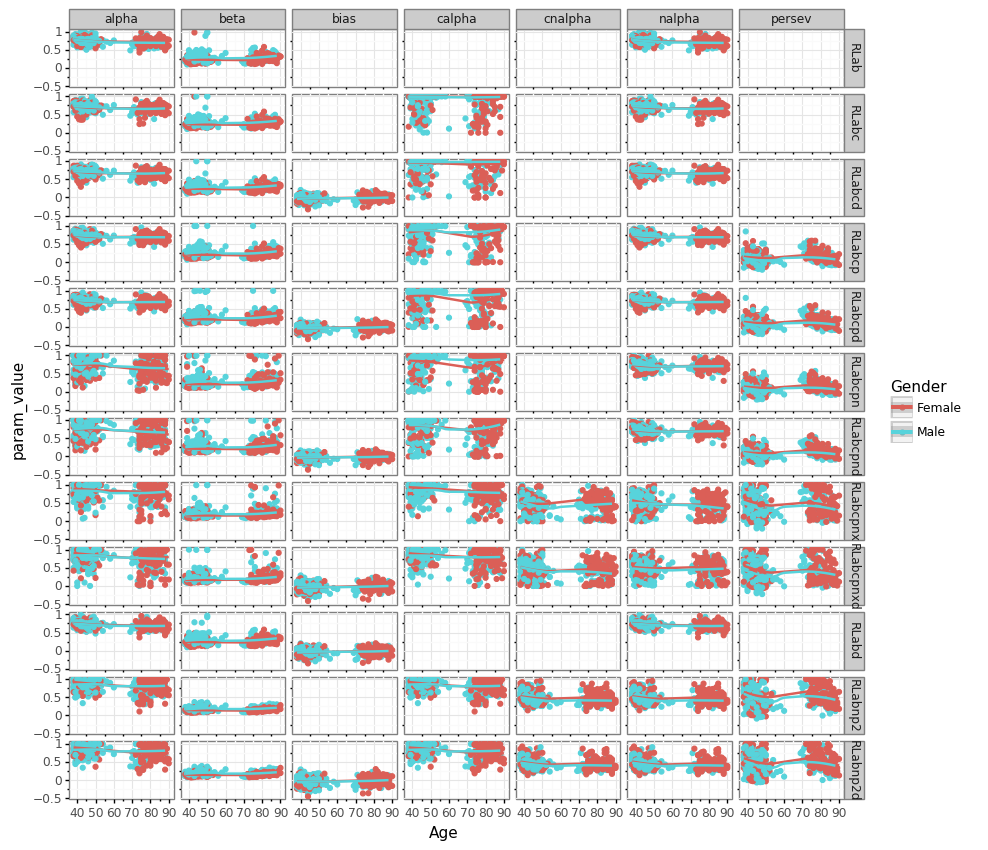

In [30]:
g = (gg.ggplot(all_params_long, gg.aes('PreciseYrs', 'param_value', color='Gender'))
 + gg.geom_point()
 + gg.theme_bw()
 + gg.geom_smooth()
 + gg.facet_grid('model~param_name')
 + gg.labs(x='Age')
)
g.draw()
g.save(os.path.join(plot_save_dir, 'allModelsParamsAge.png'))

C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\stats\smoothers.py:168: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.
  "for lowess smoothings.", PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\utils.py:634: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat(lst, axis=axis, ignore_index=True)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\layer.py:452: PlotnineWarning: geom_point : Removed 2634 rows containing missing values.
  self.data = self.geom.handle_na(self.data)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 10 x 10 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\maria\Anacon

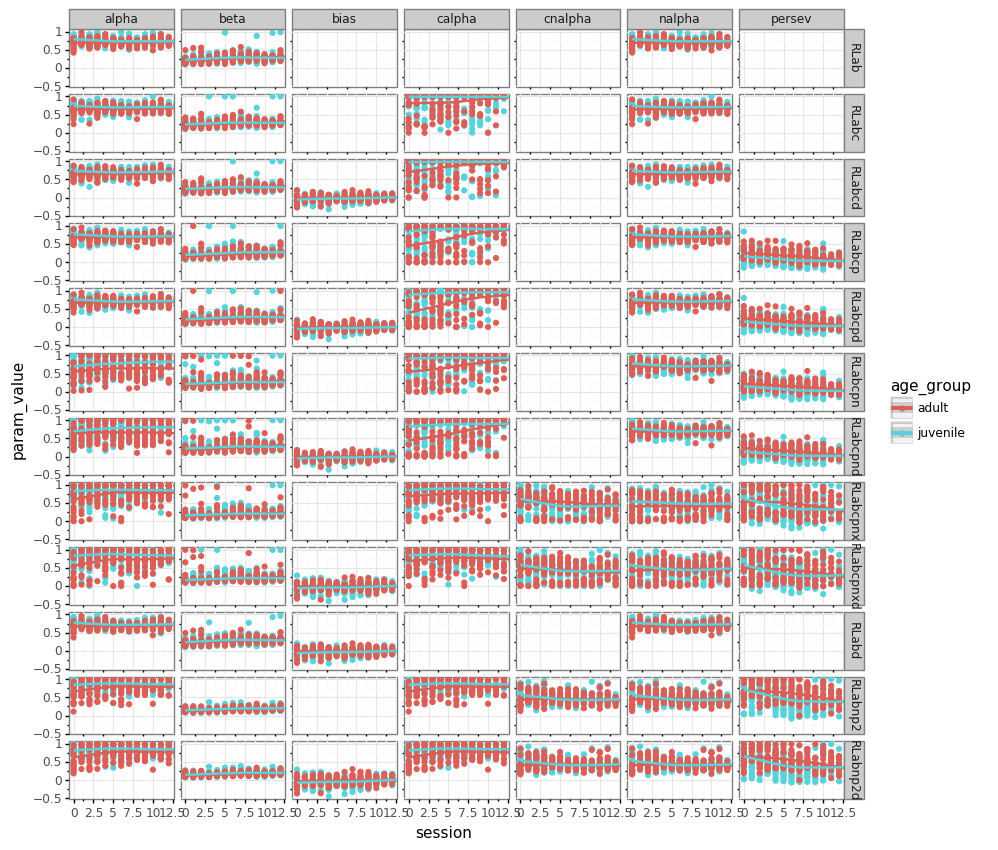

In [31]:
g = (gg.ggplot(all_params_long, gg.aes('session', 'param_value', color='age_group'))
 + gg.geom_point()
 + gg.theme_bw()
 + gg.geom_smooth()
 + gg.coord_cartesian(xlim=(0, 12))
 + gg.facet_grid('model~param_name')
)
g.draw()
g.save(os.path.join(plot_save_dir, 'allModelsParamsSession.png'))

C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\layer.py:360: PlotnineWarning: stat_summary : Removed 2634 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\utils.py:634: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat(lst, axis=axis, ignore_index=True)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 10 x 10 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/SLCN\models/plots/allModelsParamsAgegroup.png
  warn('Filename: {}'.format(filename), Plotnin

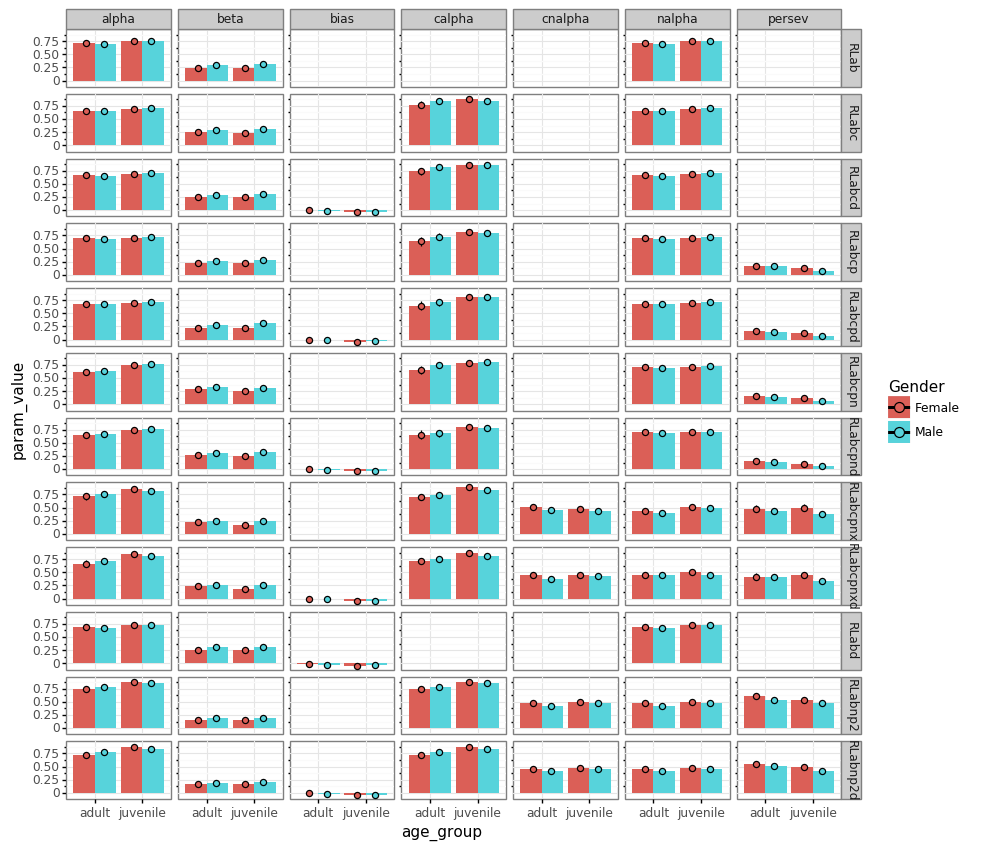

In [32]:
g = (gg.ggplot(all_params_long,
           gg.aes('age_group', 'param_value', fill='Gender'))
 + gg.stat_summary(geom='bar', position=gg.position_dodge)
 + gg.stat_summary(geom='pointrange', position=gg.position_dodge(width=0.75))
 + gg.theme_bw()
 + gg.facet_grid('model~param_name')
)
g.draw()
g.save(os.path.join(plot_save_dir, 'allModelsParamsAgegroup.png'))

C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 10 x 10 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/SLCN\models/plots/allModelsBiasSession.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


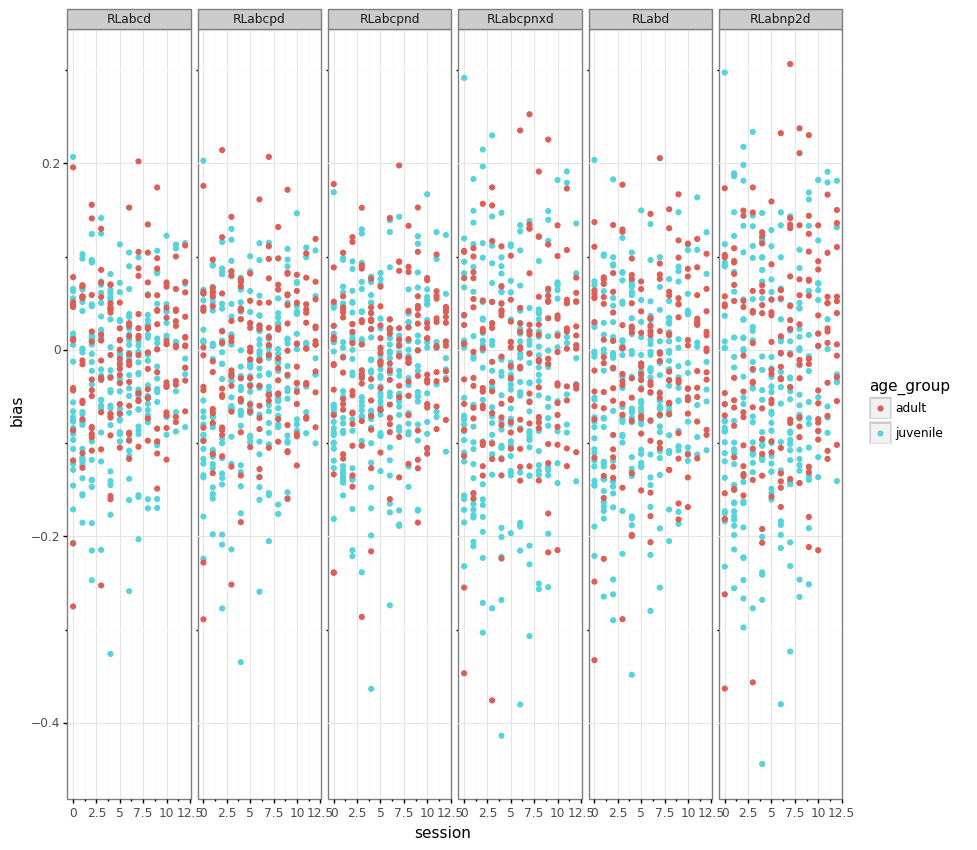

In [33]:
sub = ['d' in name for name in all_params.model]
g = (gg.ggplot(all_params[sub], gg.aes('session', 'bias', color='age_group'))
 + gg.geom_point()
 + gg.theme_bw()
 + gg.facet_grid('~model')
 + gg.coord_cartesian(xlim=(0, 12))
)
g.draw()
g.save(os.path.join(plot_save_dir, 'allModelsBiasSession.png'))

C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 10 x 10 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/SLCN\models/plots/allModelsBiasSession2.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


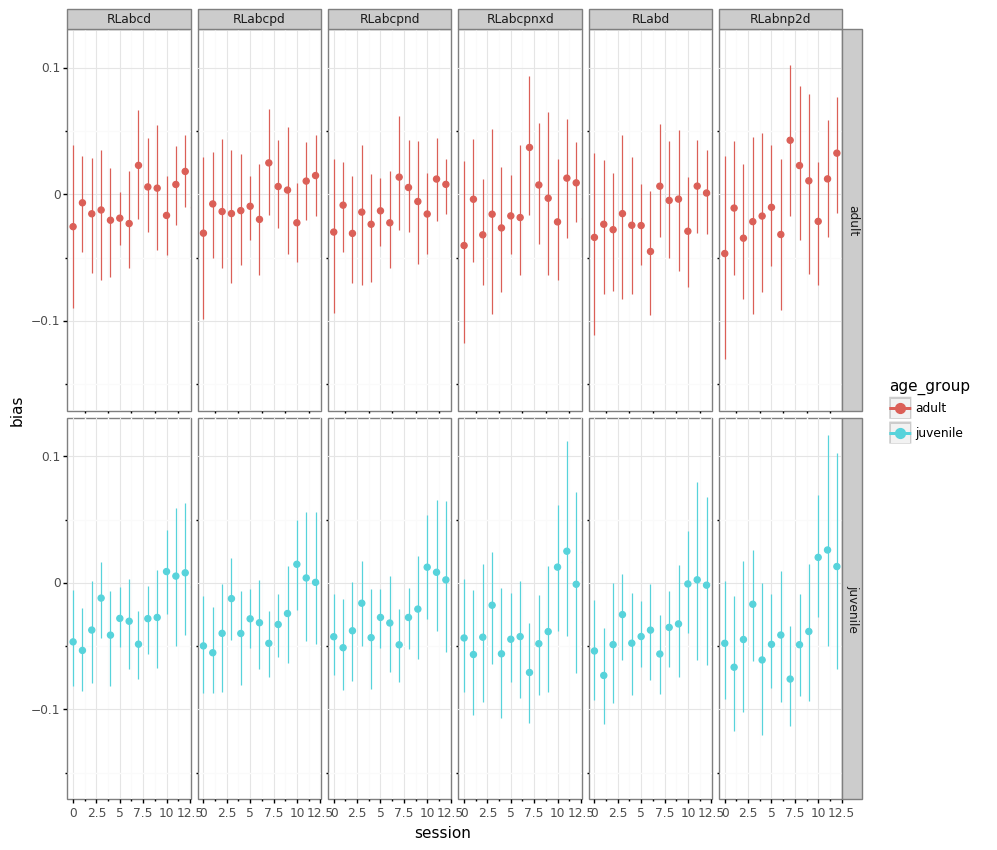

In [34]:
sub = ['d' in name for name in all_params.model]
g = (gg.ggplot(all_params[sub], gg.aes('session', 'bias', color='age_group'))
 + gg.stat_summary()
 + gg.theme_bw()
 + gg.facet_grid('age_group~model')
 + gg.coord_cartesian(xlim=(0, 12))
)
g.draw()
g.save(os.path.join(plot_save_dir, 'allModelsBiasSession2.png'))